# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

sns.set(rc = {"figure.figsize":(12,10)})

# Loading Dataset

In [2]:
data = pd.read_csv("titanic_data.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Numerical Value Analysis

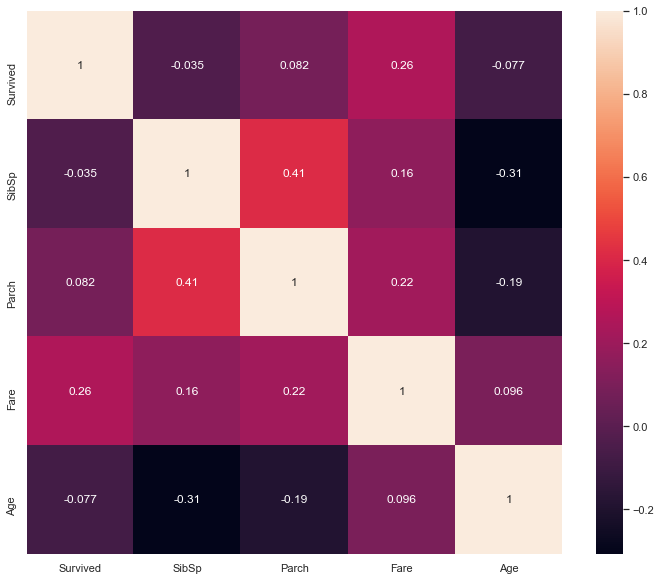

In [6]:
plt.figure(figsize=(12,10))
heatmp = sns.heatmap(data[["Survived", "SibSp","Parch", "Fare" , "Age"]].corr(), annot = True)

In [7]:
data["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

C:\Users\pushk\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pushk\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


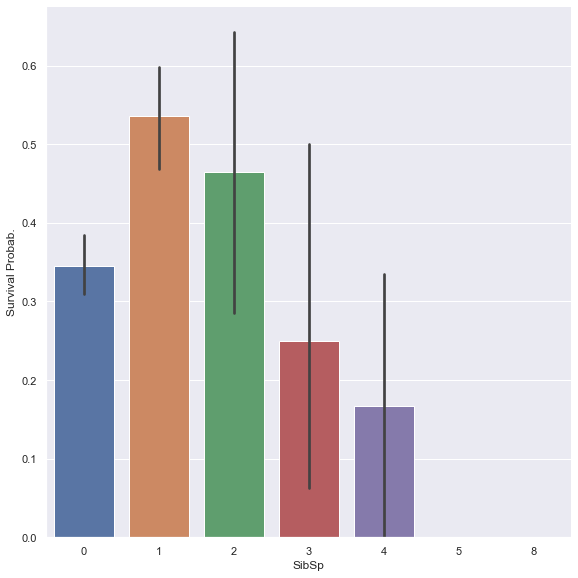

In [8]:
sns.factorplot(x = "SibSp", y = "Survived", data = data, kind = "bar", size =8).set_ylabels("Survival Probab.")

# AGE

C:\Users\pushk\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\pushk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pushk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


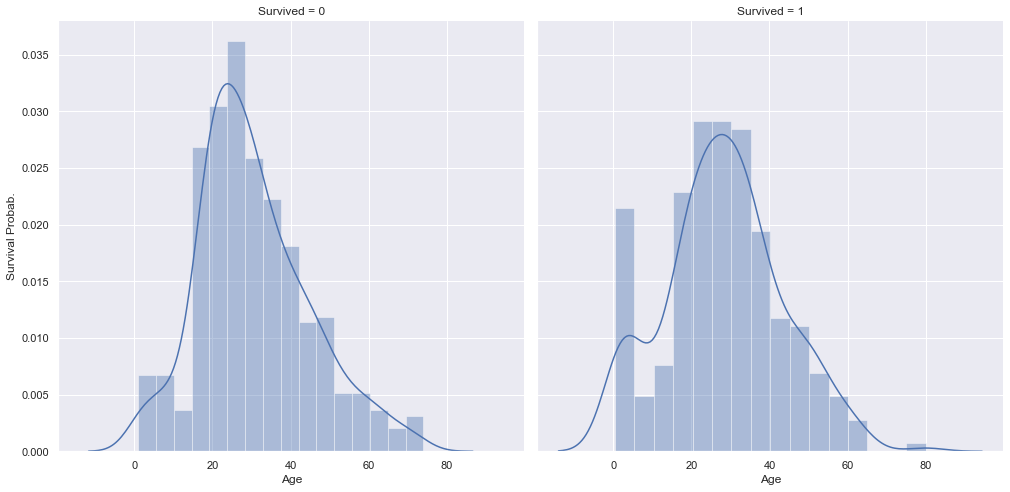

In [9]:
age_visual = sns.FacetGrid(data, col = "Survived", size = 7)
age_visual = age_visual.map(sns.distplot, "Age").set_ylabels("Survival Probab.")
                                                        

# SEX

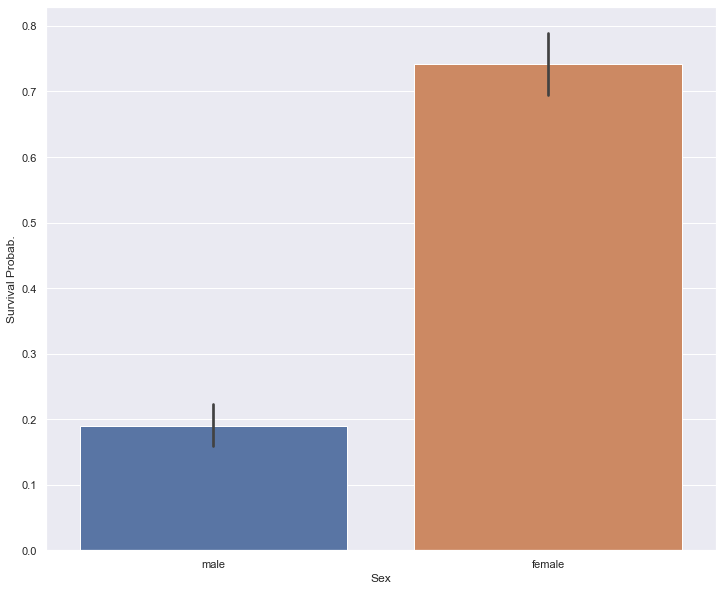

In [10]:
sex_plot = sns.barplot(x= "Sex", y = "Survived", data = data).set_ylabel("Survival Probab.")

In [11]:
data[["Sex","Survived"]].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


# Pclass

C:\Users\pushk\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pushk\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


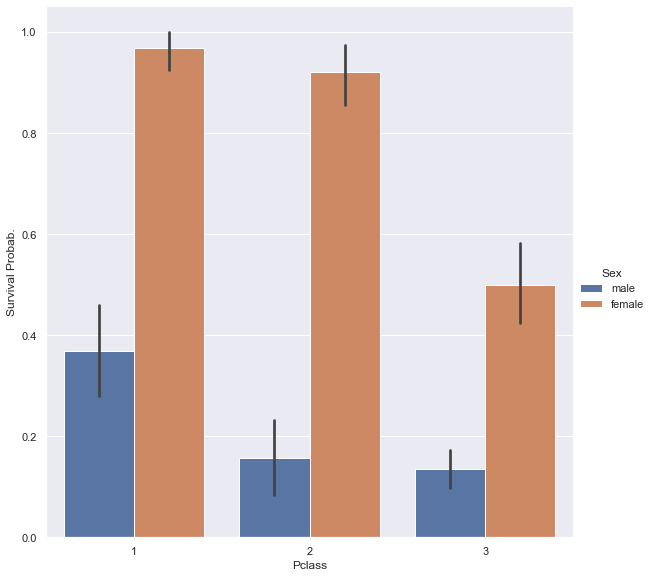

In [12]:
Pclass = sns.factorplot(x= "Pclass", y = "Survived", data = data, kind = "bar", size = 8, hue ="Sex").set_ylabels("Survival Probab.")
                                                        

# Embarked

In [14]:
data["Embarked"].isnull().sum()

2

In [17]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
data["Embarked"]=data["Embarked"].fillna("S")

C:\Users\pushk\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pushk\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


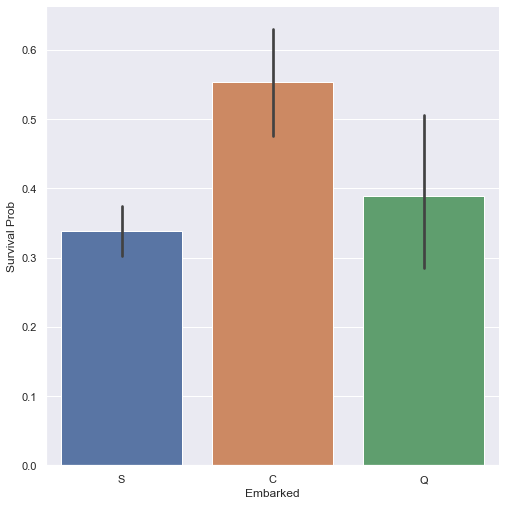

In [21]:
g = sns.factorplot(x="Embarked",y="Survived",data=data, size = 7, kind = "bar").set_ylabels("Survival Prob")

C:\Users\pushk\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pushk\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\pushk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


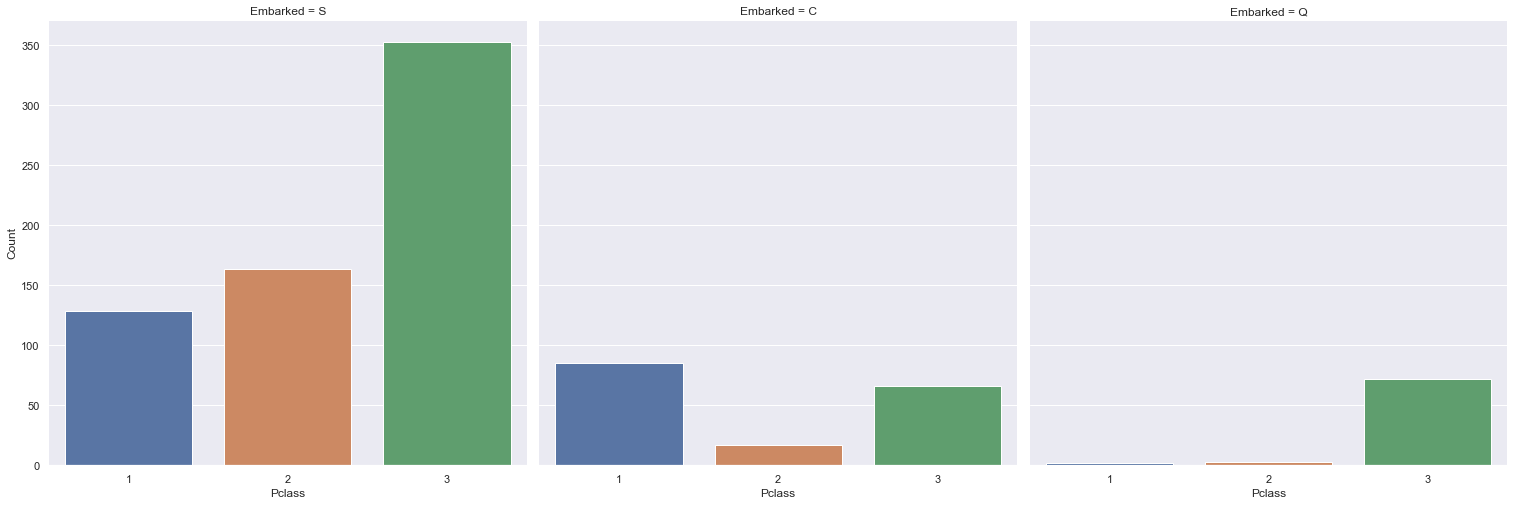

In [28]:
# Explore Pclass vs Embarked

g = sns.factorplot("Pclass", col="Embarked", data = data, size = 7, kind = "count")
g.despine(left= True)
g= g.set_ylabels("Count")



C:\Users\pushk\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pushk\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\pushk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


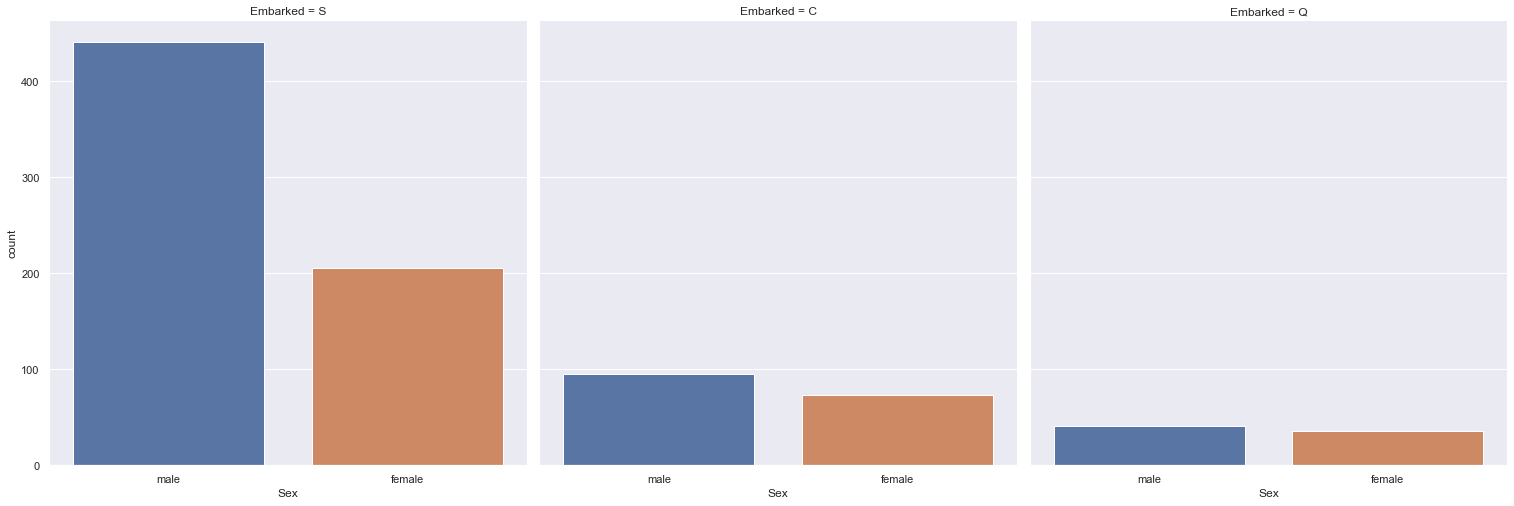

In [27]:
g = sns.factorplot("Sex", col="Embarked", data = data, size = 7, kind = "count")


# Preparing Data

In [29]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [30]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [34]:
mean = data["Age"].mean()
std = data["Age"].std()

is_null = data["Age"].isnull().sum()

In [35]:
print(mean,std,is_null)

29.69911764705882 14.526497332334044 177


In [36]:
random_age=np.random.randint(mean-std,mean+std, size=is_null)

In [39]:
a= data["Age"].copy()
a[np.isnan(a)] = random_age
data["Age"] = a

In [40]:
data["Age"].isnull().sum()

0

# Remoiving Columns

In [42]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
col_to_drop = ["Cabin","PassengerId", "Ticket","Name" ]
data.drop(col_to_drop,axis=1,inplace=True)

In [45]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [46]:
genders = {"male":0,"female":1}
data["Sex"]= data["Sex"].map(genders)


In [47]:
ports= {"S":0,"C":1,"Q":2}
data["Embarked"] = data["Embarked"].map(ports)

In [48]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


# Splitting Data

In [50]:
x = data.drop(data.columns[[0]],axis =1)
y= data["Survived"]

In [51]:
from sklearn.model_selection import train_test_split
xtrain, xtest,ytrain, ytest, =train_test_split(x,y,test_size =.30, random_state = 0)

# Scaling

In [54]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

# Classification

In [56]:
log_reg = LogisticRegression()
svc_class = SVC()
dt_class = DecisionTreeClassifier()
knn_class = KNeighborsClassifier(5)
rf_class = RandomForestClassifier(n_estimators =1000)


In [59]:
log_reg.fit(xtrain,ytrain)
svc_class.fit(xtrain,ytrain)
dt_class.fit(xtrain,ytrain)
knn_class.fit(xtrain,ytrain)
rf_class.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=1000)

In [60]:
log_reg_ypred = log_reg.predict(xtest)
svc_class_ypred = svc_class.predict(xtest)
dt_class_ypred = dt_class.predict(xtest)
knn_class_ypred = knn_class.predict(xtest)
rf_class_pred  = rf_class.predict(xtest)


# Checking Accuracy

In [64]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(ytest,log_reg_ypred)
svc_class_acc = accuracy_score(ytest,svc_class_ypred)
dt_class_acc = accuracy_score(ytest,dt_class_ypred)
knn_class_acc = accuracy_score(ytest,knn_class_ypred)
rf_class_acc = accuracy_score(ytest,rf_class_pred)



In [67]:
print("Logistics Regression : ", round(logreg_acc*100,2)  )
print("Support Vector       : ", round(svc_class_acc*100,2)  )
print("Decision Tree        : ", round(dt_class_acc*100,2)  )
print("K-NN Classifier      : ", round(knn_class_acc*100,2)  )
print("Random Forest        : ", round(rf_class_acc*100,2)  )

Logistics Regression :  81.34
Support Vector       :  82.09
Decision Tree        :  79.1
K-NN Classifier      :  80.97
Random Forest        :  81.72
